In [1]:
import torch
import numpy as np
import torchvision
import torchio as tio
from lib.data import *
from lib.utils import *
import matplotlib.pyplot as plt
from IPython import display
from tqdm.notebook import tqdm
from pathlib import Path

In [2]:
root = Path('data')
images_dir = root / 'images'
labels_dir = root / 'labels'

images = sorted(images_dir.glob('*.nii.gz'))
labels = sorted(labels_dir.glob('*.nii.gz'))

In [3]:
dataset = get_dataset_from_path(images, labels)

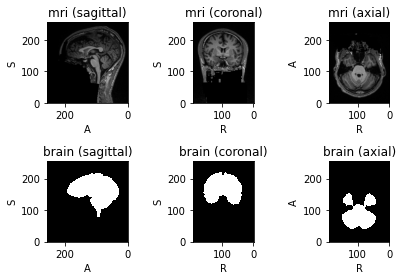

ScalarImage(shape: (1, 256, 256, 192); spacing: (1.00, 1.00, 1.00); orientation: PIR+; memory: 48.0 MiB; dtype: torch.FloatTensor)
LabelMap(shape: (1, 256, 256, 192); spacing: (1.00, 1.00, 1.00); orientation: PIR+; memory: 48.0 MiB; dtype: torch.FloatTensor)
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [4]:
a = dataset[0]
a.plot()
print(a.mri)
print(a.brain)
print(type(a.mri.data))
print(type(a.brain.data))

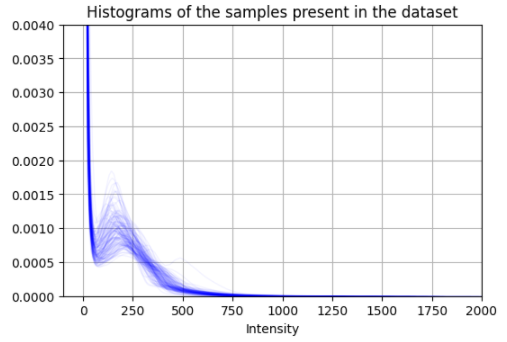

In [5]:
# get_histogram_plot(dataset)
display.Image('histogram_intensity_in_dataset.png')

In [6]:
landmarks_path = 'NFBS_histogram_landmarks.npy'
# train_histograms(images, landmarks_path)

In [ ]:
get_histogram_plot(dataset, use_histogram_landmarks=True, landmarks_path=landmarks_path)

 46%|███████████████████████████████████                                          | 57/125 [1:01:42<1:09:20, 61.18s/it]

In [ ]:
training_set, validation_set = load_datasets(images, labels, volume="whole", test_size=0.2)

In [ ]:
a = training_set[14]
a.plot()
print(a.mri)
print(a.brain)

In [ ]:
a = validation_set[5]
a.plot()
print(a.mri)
print(a.brain)

In [ ]:
train_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validation_set, batch_size=4)

In [ ]:
k = 128
batch = next(iter(train_loader))
batch_mri = batch['mri'][tio.DATA][..., k]
batch_label = batch['brain'][tio.DATA][:, 1:, ..., k]
slices = torch.cat((batch_mri, batch_label))
image_path = 'batch_whole_images.png'
torchvision.utils.save_image(
    slices,
    image_path,
    nrow=4,
    normalize=True,
    scale_each=True,
    padding=0,
)
display.Image(image_path)

In [ ]:
training_set, validation_set = load_datasets(images, labels, patch_size=128, volume="patches", test_size=0.2)

In [ ]:
a = training_set[14]
a.plot()
print(a.mri)
print(a.brain)

In [ ]:
a = validation_set[5]
a.plot()
print(a.mri)
print(a.brain)

In [ ]:
train_loader = torch.utils.data.DataLoader(training_set, batch_size=16, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validation_set, batch_size=4)

In [ ]:
k = 80
for _ in range(2): batch = next(iter(train_loader))
batch_mri = batch['mri'][tio.DATA][..., k]
batch_label = batch['brain'][tio.DATA][:, 1:, ..., k]
slices = torch.cat((batch_mri, batch_label))
image_path = 'batch_patches.png'
torchvision.utils.save_image(
    slices,
    image_path,
    nrow=16,
    normalize=True,
    scale_each=True,
)
display.Image(image_path)